In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# seaborn is optional but helps a lot for clean visuals
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

sns.set_theme(style="whitegrid")


In [2]:
DATA_PATH = "../data/transaction_dataset.csv"  # <-- change if needed
df_raw = pd.read_csv(DATA_PATH)

print("Shape:", df_raw.shape)
display(df_raw.head(3))
display(df_raw.tail(3))


Shape: (9841, 51)


,SrNo,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON


,SrNo,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.31,1.234192,0.004,9.5,0.922179,0.0,0.0,0.0,110,61.785995,53.070252,0.0,-8.715743,5.0,1503.469504,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1500.000,300.693901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,0.50,0.500000,0.000,0.0,0.000000,0.0,0.0,0.0,1,0.000000,0.500000,0.0,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9840,9840,2179,0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c,1,37242.70,149.56,670817.33,18,3,0,1,5,0.795233,18998.00,6333.265078,0.900,1000.0,644.427778,0.0,0.0,0.0,21,11599.700000,18999.795230,0.0,7400.095233,44.0,60070.751790,0.0,0.0,0.0,37.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,20180.614,1365.244359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,,INS Promo1


In [3]:
df = df_raw.copy()

# Clean column names: strip, collapse spaces, replace problematic chars
df.columns = (
    df.columns
      .str.strip()
      .str.replace(r"\s+", " ", regex=True)
)

# Fix a common broken column name seen in some versions of this dataset
for c in df.columns:
    if "total transactions" in c and c.endswith("contract"):
        # Example: 'total transactions (including tnx to create contract'
        pass

# Ensure FLAG is numeric integer (0/1)
if "FLAG" in df.columns:
    df["FLAG"] = pd.to_numeric(df["FLAG"], errors="coerce").astype("Int64")

print("Columns:", len(df.columns))
display(pd.DataFrame({"col": df.columns, "dtype": df.dtypes.astype(str)}).head(15))


Columns: 51


,col,dtype
SrNo,SrNo,int64
Index,Index,int64
Address,Address,object
FLAG,FLAG,Int64
Avg min between sent tnx,Avg min between sent tnx,float64
Avg min between received tnx,Avg min between received tnx,float64
Time Diff between first and last (Mins),Time Diff between first and last (Mins),float64
Sent tnx,Sent tnx,int64
Received Tnx,Received Tnx,int64
Number of Created Contracts,Number of Created Contracts,int64


In [4]:
print(df.info())

# Missingness summary
missing = df.isna().mean().sort_values(ascending=False)
missing = missing[missing > 0]
print("\nColumns with missing values:", len(missing))
display(missing.to_frame("missing_rate").head(20))

# Duplicate rows?
dup_rows = df.duplicated().sum()
print("Duplicate rows:", dup_rows)

# Duplicate addresses (if exists)
if "Address" in df.columns:
    dup_addr = df["Address"].duplicated().sum()
    print("Duplicate addresses:", dup_addr)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   SrNo                                                  9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   Int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

,missing_rate
ERC20 most sent token type,0.274058
ERC20_most_rec_token_type,0.088507
ERC20 avg val sent,0.084239
ERC20 total Ether received,0.084239
ERC20 total ether sent,0.084239
ERC20 avg time between rec tnx,0.084239
ERC20 avg time between rec 2 tnx,0.084239
ERC20 max val rec,0.084239
ERC20 avg val rec,0.084239
ERC20 avg time between contract tnx,0.084239


Duplicate rows: 0
Duplicate addresses: 25


,count
FLAG,
0,7662
1,2179


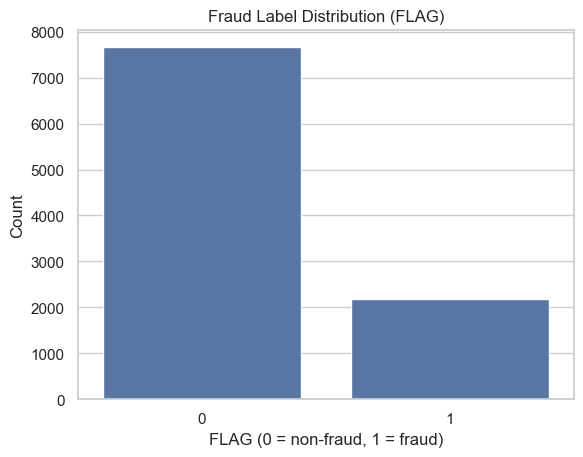

Fraud rate: 22.142%


In [5]:
if "FLAG" not in df.columns:
    raise ValueError("No FLAG column found. Please confirm target column name.")

target_counts = df["FLAG"].value_counts(dropna=False).sort_index()
display(target_counts.to_frame("count"))

plt.figure()
sns.barplot(x=target_counts.index.astype(str), y=target_counts.values)
plt.title("Fraud Label Distribution (FLAG)")
plt.xlabel("FLAG (0 = non-fraud, 1 = fraud)")
plt.ylabel("Count")
plt.show()

fraud_rate = (df["FLAG"] == 1).mean()
print(f"Fraud rate: {fraud_rate:.3%}")


In [6]:
# Common ID-like columns that usually shouldn't be modeled directly
id_like = [c for c in ["SrNo", "Index", "Address"] if c in df.columns]

# Separate features
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number, "Int64"]).columns.tolist()

# Remove target from numeric
numeric_cols = [c for c in numeric_cols if c != "FLAG"]

print("ID-like columns:", id_like)
print("Numeric columns:", len(numeric_cols))
print("Categorical columns:", len(categorical_cols))
print("\nCategorical sample:", categorical_cols[:5])
print("Numeric sample:", numeric_cols[:5])


ID-like columns: ['SrNo', 'Index', 'Address']
Numeric columns: 47
Categorical columns: 3

Categorical sample: ['Address', 'ERC20 most sent token type', 'ERC20_most_rec_token_type']
Numeric sample: ['SrNo', 'Index', 'Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)']


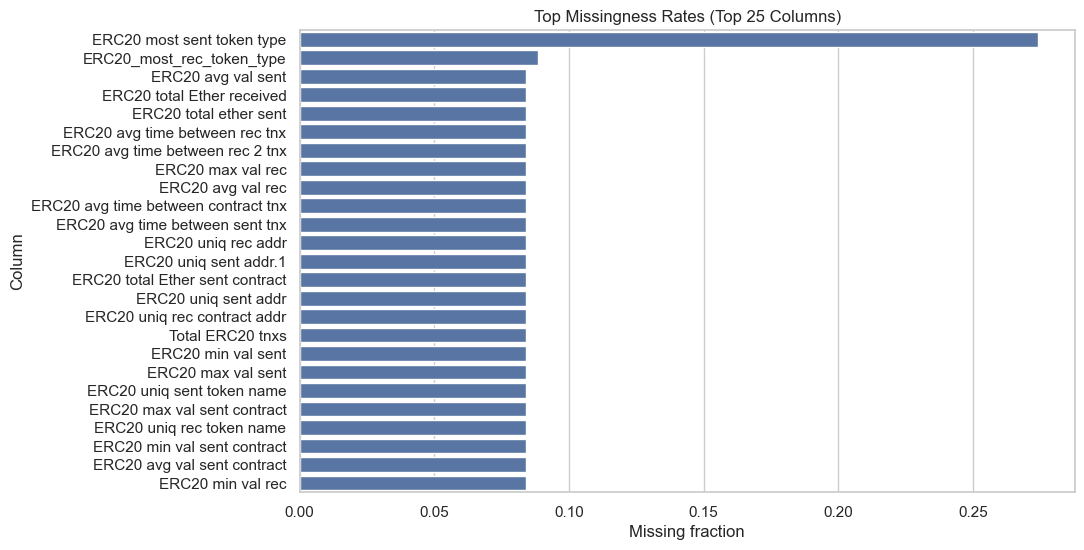

In [7]:
missing_rate = df.isna().mean().sort_values(ascending=False)
top_missing = missing_rate.head(25)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_missing.values, y=top_missing.index)
plt.title("Top Missingness Rates (Top 25 Columns)")
plt.xlabel("Missing fraction")
plt.ylabel("Column")
plt.show()


In [8]:
# Overall numeric summary
display(df[numeric_cols].describe().T.sort_values("std", ascending=False).head(20))

# Grouped summary: mean/median by class
group_stats = df.groupby("FLAG")[numeric_cols].agg(["mean", "median"])
display(group_stats)


,count,mean,std,min,25%,50%,75%,max
ERC20 total Ether received,9012.0,1.296207e+08,1.053858e+10,0.00,0.000000,1.000000e-12,100.337000,1.000020e+12
ERC20 max val rec,9012.0,1.252524e+08,1.053741e+10,0.00,0.000000,0.000000e+00,99.000000,1.000000e+12
ERC20 total ether sent,9012.0,1.386849e+07,1.180390e+09,0.00,0.000000,0.000000e+00,0.000000,1.120000e+11
ERC20 max val sent,9012.0,1.303594e+07,1.179905e+09,0.00,0.000000,0.000000e+00,0.000000,1.120000e+11
ERC20 avg val sent,9012.0,6.318389e+06,5.914764e+08,0.00,0.000000,0.000000e+00,0.000000,5.614756e+10
ERC20 avg val rec,9012.0,4.346203e+06,2.141192e+08,0.00,0.000000,0.000000e+00,29.464673,1.724181e+10
ERC20 min val sent,9012.0,1.174126e+04,1.053567e+06,0.00,0.000000,0.000000e+00,0.000000,1.000000e+08
total ether received,9841.0,1.163832e+04,3.642048e+05,0.00,2.670424,3.052963e+01,101.000000,2.858159e+07
total Ether sent,9841.0,1.016092e+04,3.583227e+05,0.00,0.226206,1.248680e+01,100.998974,2.858096e+07
Time Diff between first and last (Mins),9841.0,2.183333e+05,3.229379e+05,0.00,316.930000,4.663703e+04,304070.980000,1.954861e+06


SrNo                Index         Avg min between sent tnx         Avg min between received tnx            \
        mean  median         mean  median                     mean  median                         mean    median   
FLAG                                                                                                                
0     3830.5  3830.5  2021.247194  1916.0              5427.797217  22.745                  9463.813842  1402.135   
1     8751.0  8751.0  1090.000000  1090.0              3888.109780   0.000                  2874.712639    82.070   

     Time Diff between first and last (Mins)               Sent tnx        Received Tnx        Number of Created Contracts         \
                                        mean     median        mean median         mean median                        mean median   
FLAG                                                                                                                                
0                              264718.257931  116626.00  147.430175    3.0   203.494388    5.0                    4.763900    0.0   
1                               55230.057953    7545.43    5.173933    1.0    23.775585    3.0                    0.093162    0.0   

     Unique Received From Addresses        Unique Sent To Addresses        min value received           max value received             \
                               mean median                     mean median               mean    median               mean     median   
FLAG                                                                                                                                    
0                         35.447272    2.0                32.253067    2.0          47.606401  0.157340         656.750247  12.216789   
1                         12.475906    3.0                 3.290500    1.0          30.619509  0.004463          53.383739   0.997900   

     avg val received           min val sent           max val sent           avg val sent           min value sent to contract         \
                 mean    median         mean    median         mean    median         mean    median                       mean median   
FLAG                                                                                                                                     
0          118.989750  3.747374     4.310314  0.055176   393.932645  9.698321    52.858578  2.309737                   0.000004    0.0   
1           36.440837  0.500134     6.522282  0.010000    35.721383  0.688005    16.263756  0.499139                   0.000000    0.0   

     max val sent to contract        avg value sent to contract        total transactions (including tnx to create contract         \
                         mean median                       mean median                                                 mean median   
FLAG                                                                                                                                 
0                     0.00001    0.0                   0.000007    0.0                                         355.688463     11.0   
1                     0.00000    0.0                   0.000000    0.0                                          29.042680      5.0   

     total Ether sent            total ether received            total ether sent contracts        total ether balance            \
                 mean     median                 mean     median                       mean median                mean    median   
FLAG                                                                                                                               
0        13025.745228  34.062257         14920.589930  71.718959                    0.00001    0.0         1894.844692  0.002200   
1           87.373398   0.999139            96.894721   1.678836                    0.00000    0.0            9.521323  0.000861   

     Total ERC20 tnxs        ERC20 total Ether 

,feature,std_mean_diff,abs_smd
0,SrNo,3.026108,3.026108
1,Index,-0.928733,0.928733
4,Time Diff between first and last (Mins),-0.813936,0.813936
3,Avg min between received tnx,-0.339056,0.339056
19,total transactions (including tnx to create co...,-0.299923,0.299923
5,Sent tnx,-0.235103,0.235103
6,Received Tnx,-0.234394,0.234394
15,avg val sent,-0.146121,0.146121
9,Unique Sent To Addresses,-0.137066,0.137066
8,Unique Received From Addresses,-0.094632,0.094632


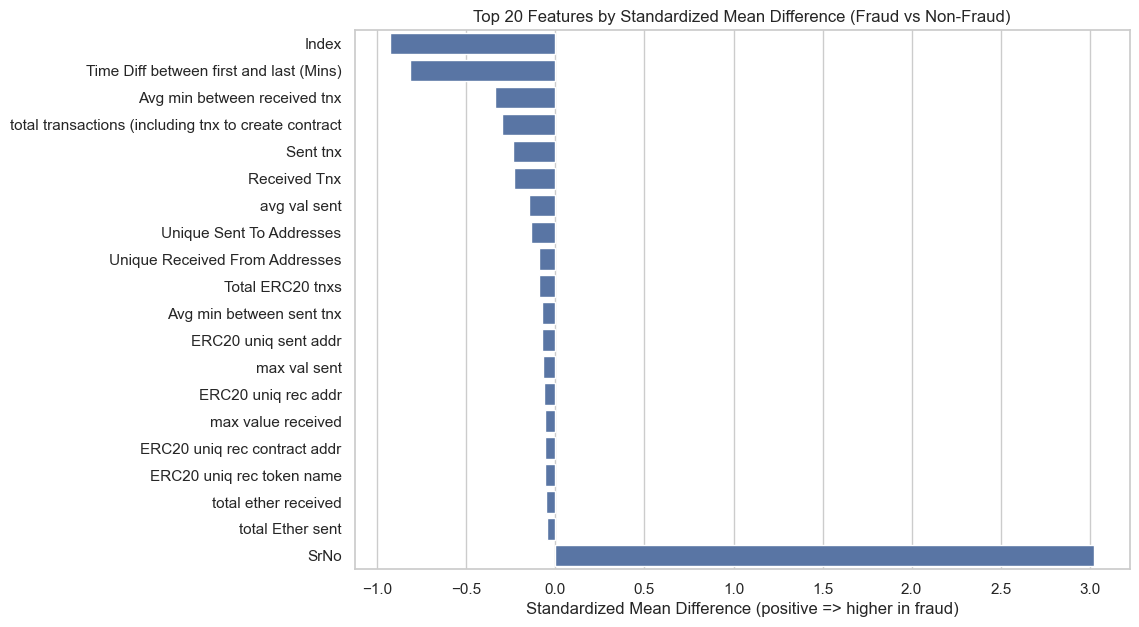

In [9]:
def standardized_mean_diff(x0, x1):
    # Cohen's d-like: (mean1 - mean0) / pooled_std
    m0, m1 = np.nanmean(x0), np.nanmean(x1)
    s0, s1 = np.nanstd(x0), np.nanstd(x1)
    pooled = np.sqrt((s0**2 + s1**2) / 2)
    if pooled == 0 or np.isnan(pooled):
        return np.nan
    return (m1 - m0) / pooled

rows = []
df0 = df[df["FLAG"] == 0]
df1 = df[df["FLAG"] == 1]

for c in numeric_cols:
    d = standardized_mean_diff(df0[c].values, df1[c].values)
    rows.append((c, d))

smd = pd.DataFrame(rows, columns=["feature", "std_mean_diff"]).dropna()
smd["abs_smd"] = smd["std_mean_diff"].abs()
smd = smd.sort_values("abs_smd", ascending=False)

display(smd.head(20))

plt.figure(figsize=(10, 7))
top = smd.head(20).sort_values("std_mean_diff")
sns.barplot(data=top, x="std_mean_diff", y="feature")
plt.title("Top 20 Features by Standardized Mean Difference (Fraud vs Non-Fraud)")
plt.xlabel("Standardized Mean Difference (positive => higher in fraud)")
plt.ylabel("")
plt.show()


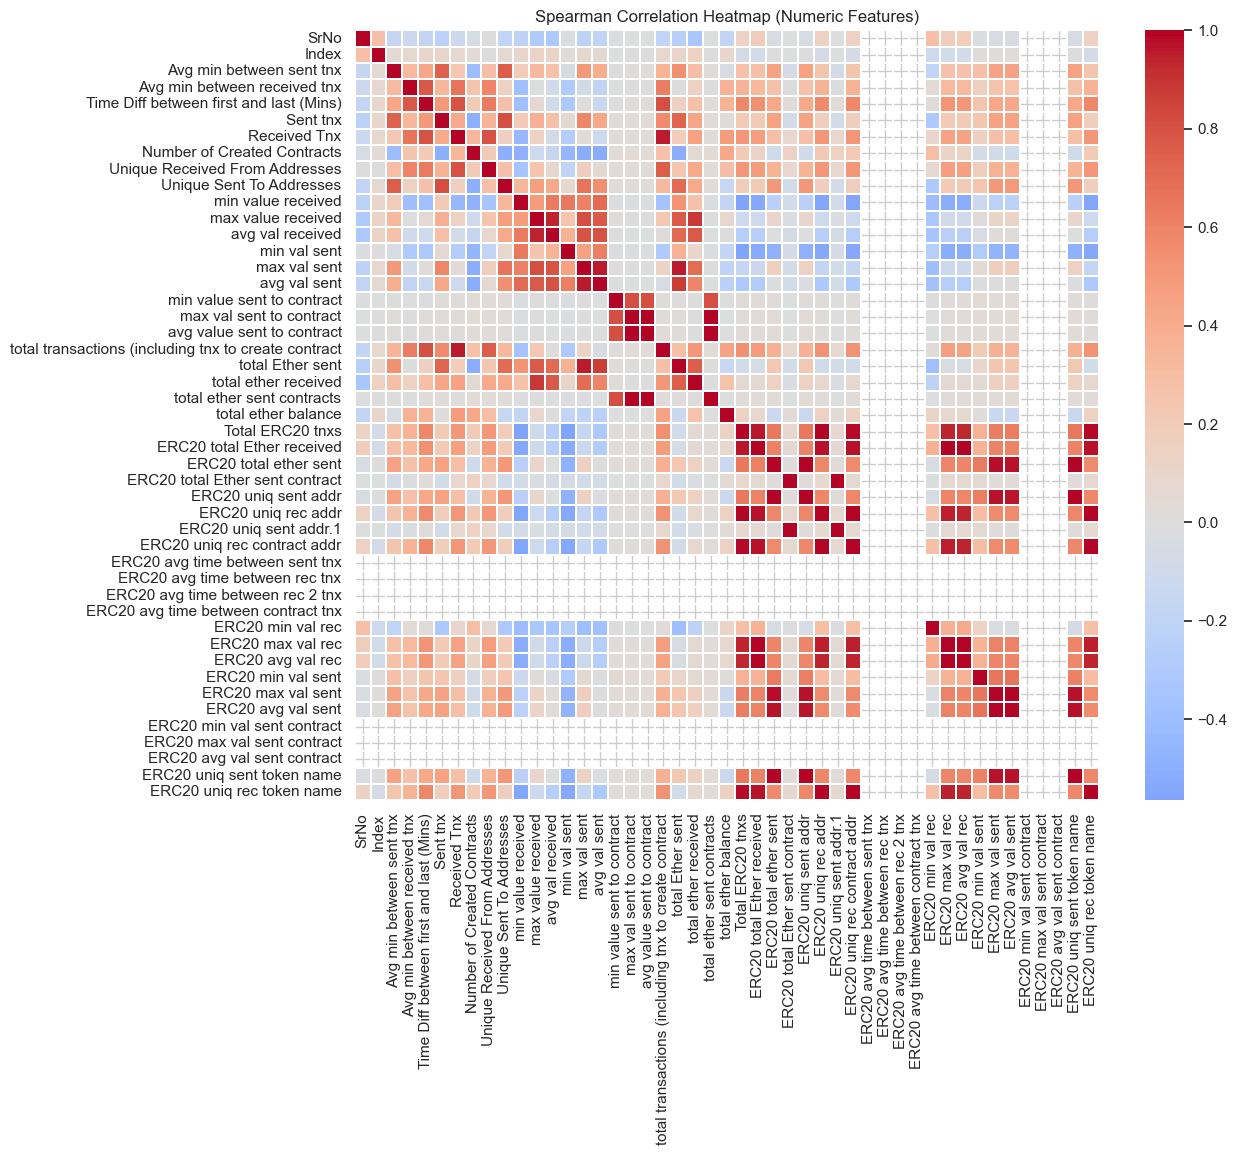

In [10]:
# Use Spearman to reduce the effect of extreme outliers
corr = df[numeric_cols].corr(method="spearman")

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.2)
plt.title("Spearman Correlation Heatmap (Numeric Features)")
plt.show()


,spearman_corr_with_FLAG
SrNo,0.719153
ERC20 min val rec,0.456909
total ether received,-0.456258
avg val received,-0.421640
max value received,-0.405829
total Ether sent,-0.335351
Sent tnx,-0.322166
Index,-0.310112
ERC20 avg val rec,0.296239
min value received,-0.294297


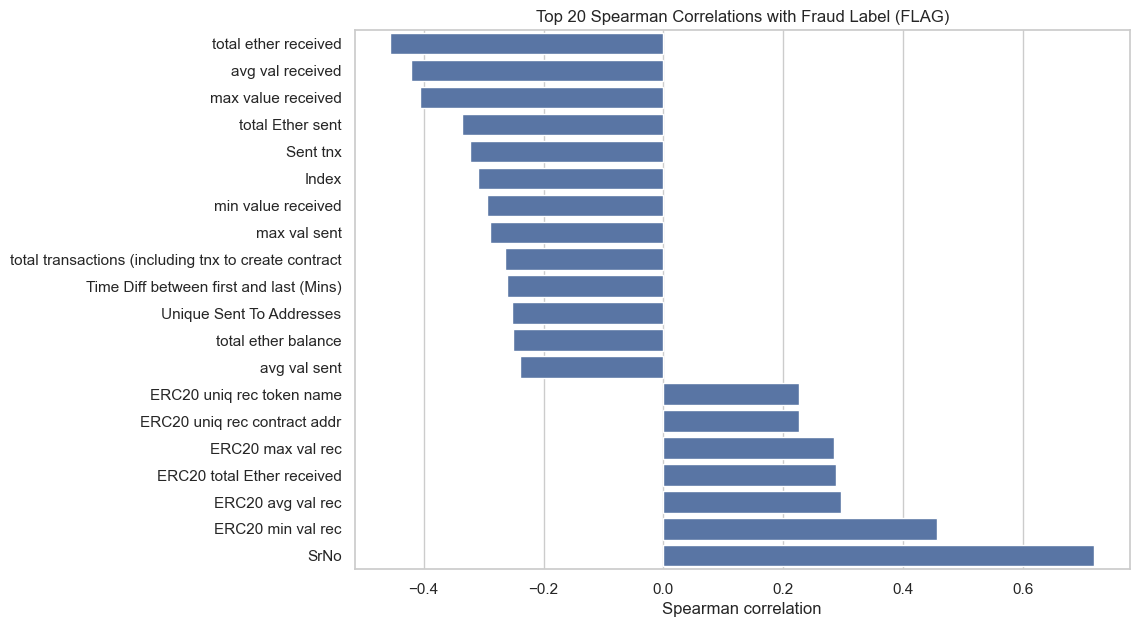

In [11]:
target_corr = df[numeric_cols].apply(lambda s: s.corr(df["FLAG"].astype(float), method="spearman"))
target_corr = target_corr.sort_values(key=lambda x: x.abs(), ascending=False)

display(target_corr.head(20).to_frame("spearman_corr_with_FLAG"))

plt.figure(figsize=(10, 7))
top_tc = target_corr.head(20).sort_values()
sns.barplot(x=top_tc.values, y=top_tc.index)
plt.title("Top 20 Spearman Correlations with Fraud Label (FLAG)")
plt.xlabel("Spearman correlation")
plt.ylabel("")
plt.show()


Plotting: ['Sent tnx', 'Received Tnx', 'Unique Received From Addresses', 'Unique Sent To Addresses', 'total Ether sent', 'total ether received', 'total ether balance', 'Total ERC20 tnxs', 'ERC20 total Ether received', 'ERC20 total ether sent', 'Time Diff between first and last (Mins)']


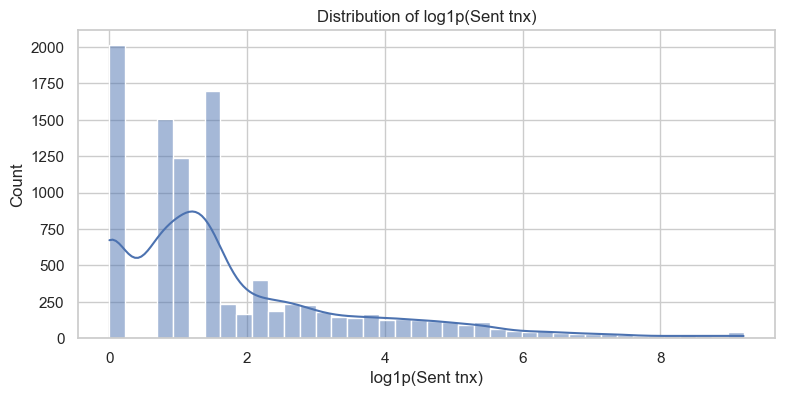

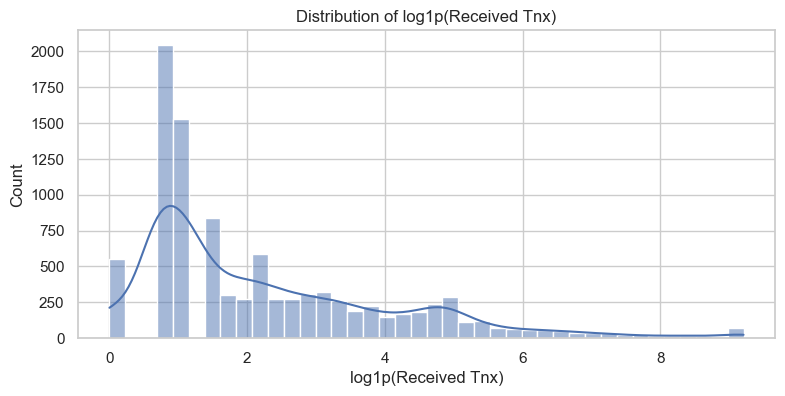

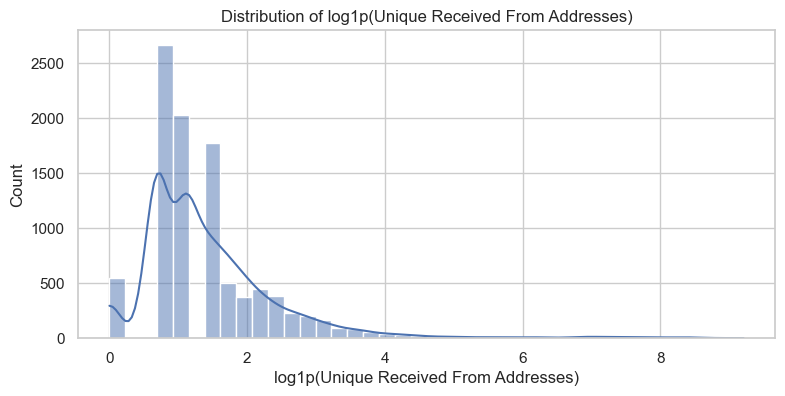

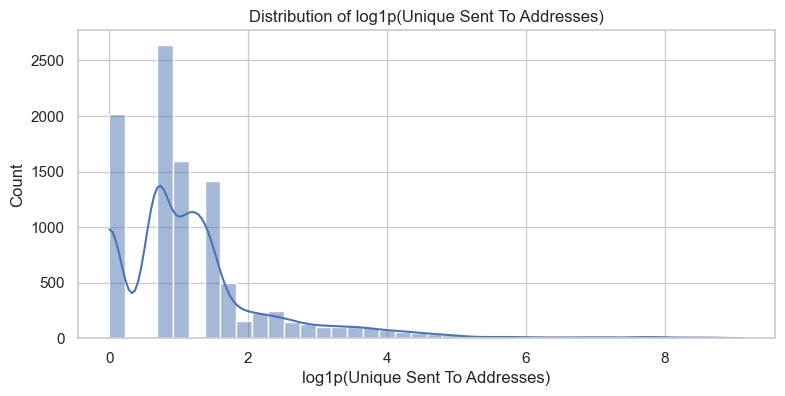

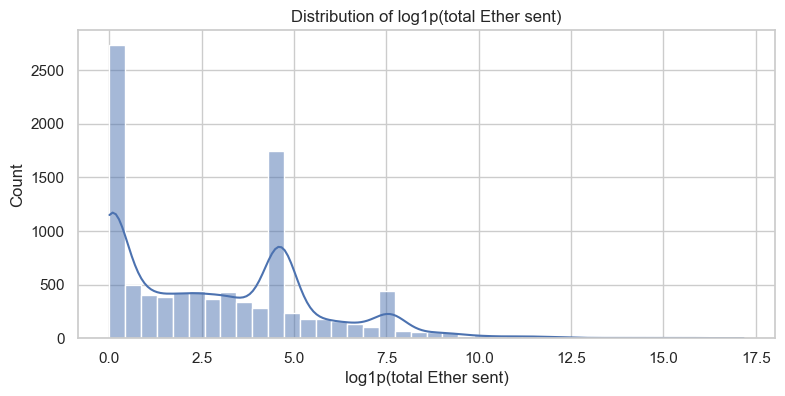

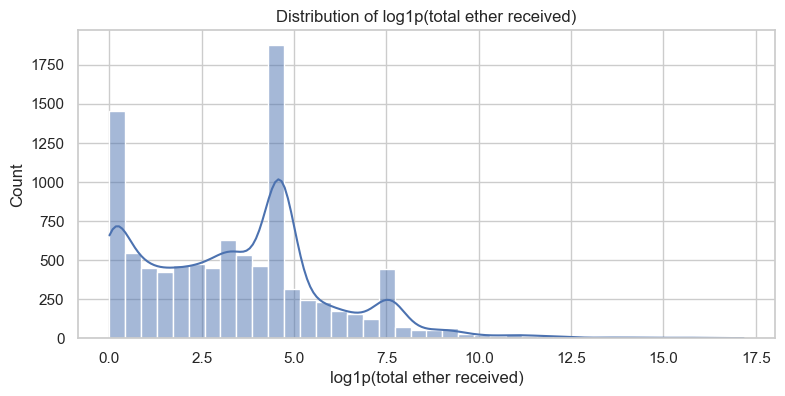

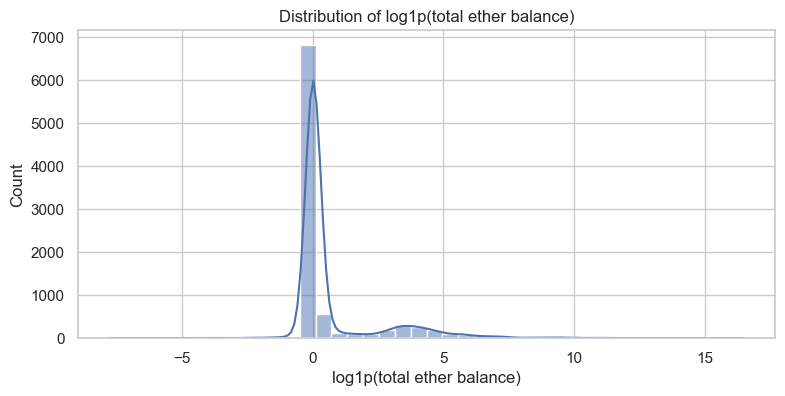

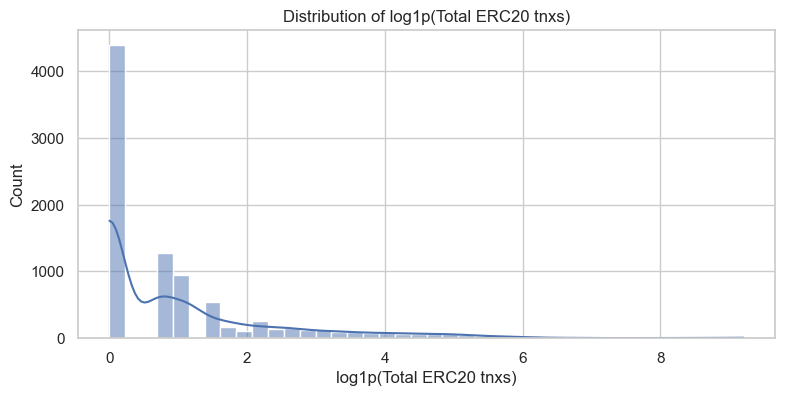

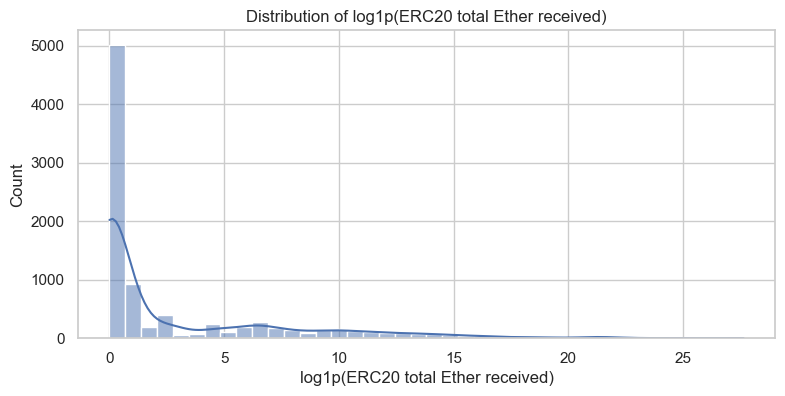

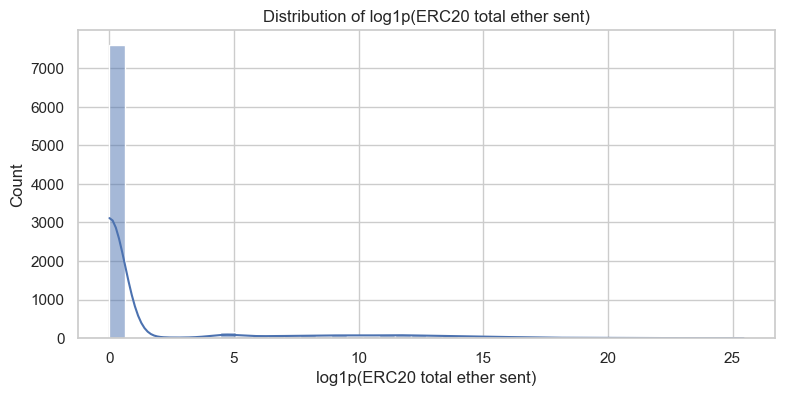

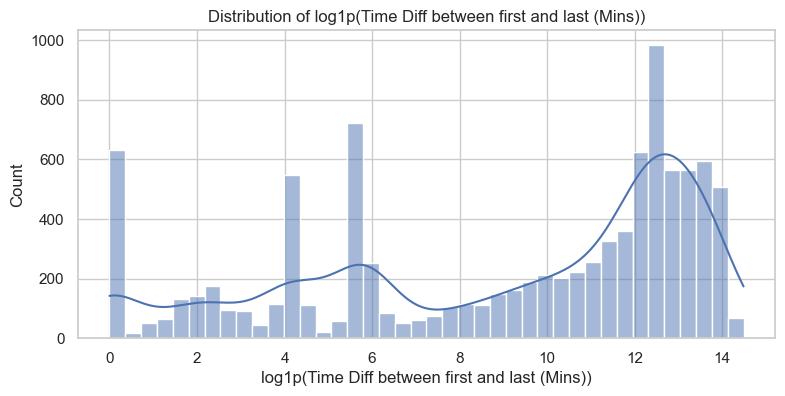

In [12]:
# Pick a curated set of "high-signal" features often relevant in this dataset
candidate = [
    "Sent tnx", "Received Tnx",
    "Unique Received From Addresses", "Unique Sent To Addresses",
    "total Ether sent", "total ether received", "total ether balance",
    "Total ERC20 tnxs", "ERC20 total Ether received", "ERC20 total ether sent",
    "Time Diff between first and last (Mins)"
]
candidate = [c for c in candidate if c in df.columns]

print("Plotting:", candidate)

for c in candidate:
    plt.figure(figsize=(9, 4))
    x = df[c].astype(float)
    # log1p makes zeros valid
    sns.histplot(np.log1p(x), bins=40, kde=True)
    plt.title(f"Distribution of log1p({c})")
    plt.xlabel(f"log1p({c})")
    plt.ylabel("Count")
    plt.show()


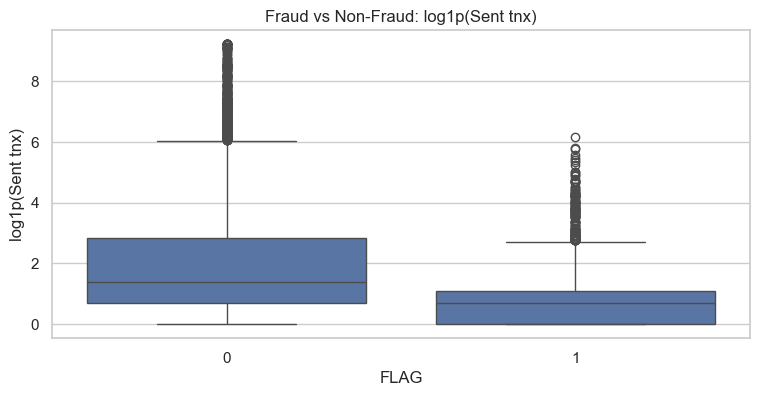

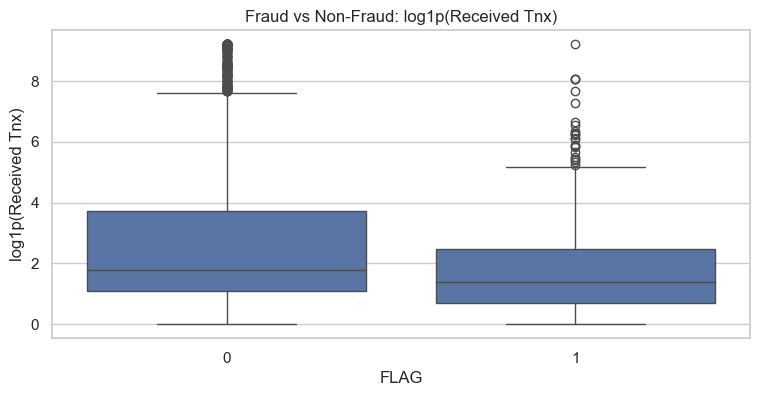

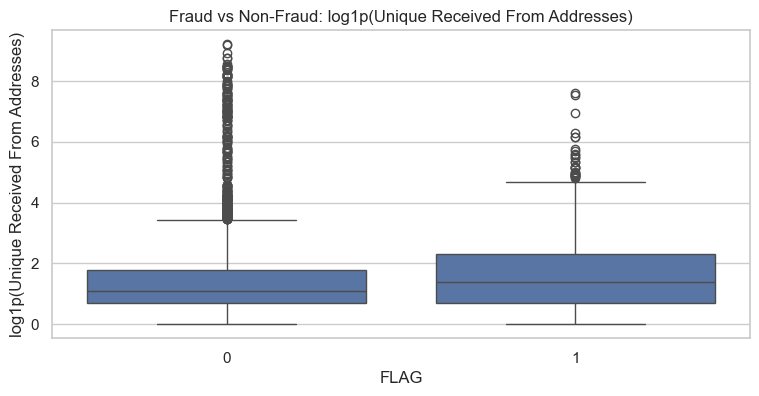

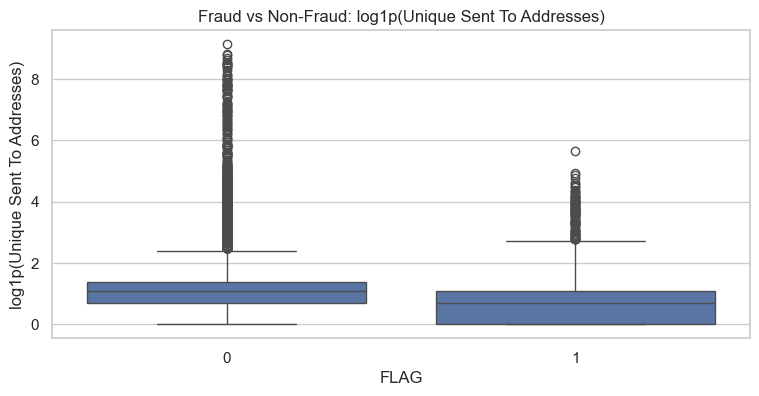

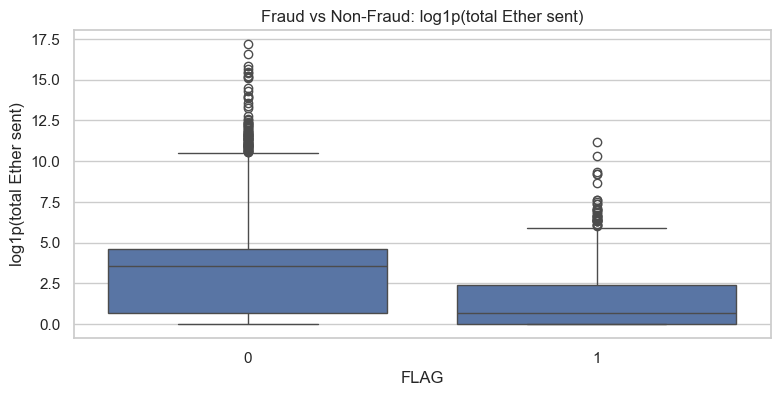

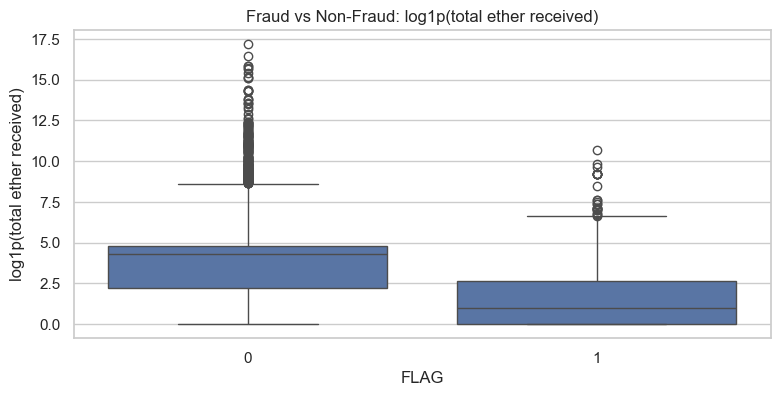

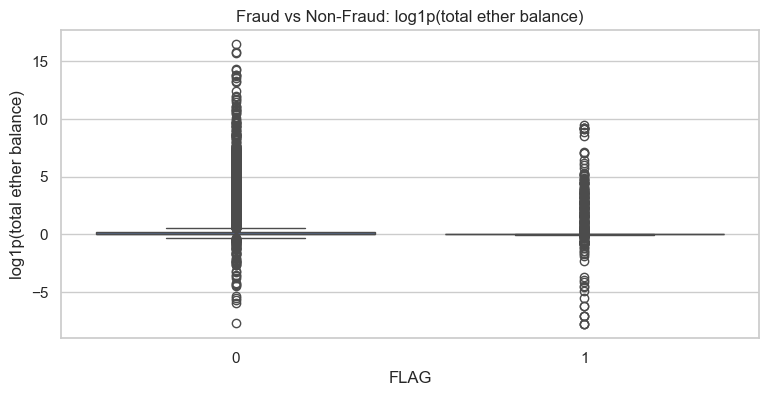

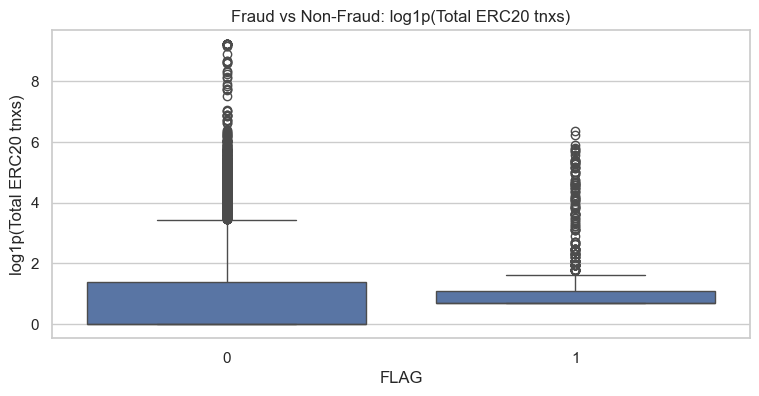

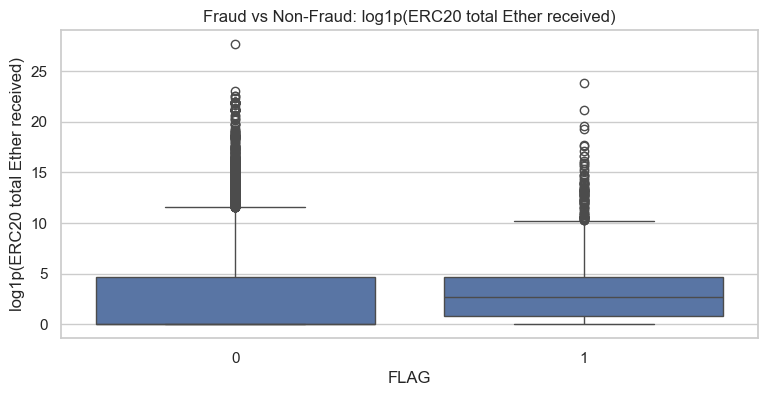

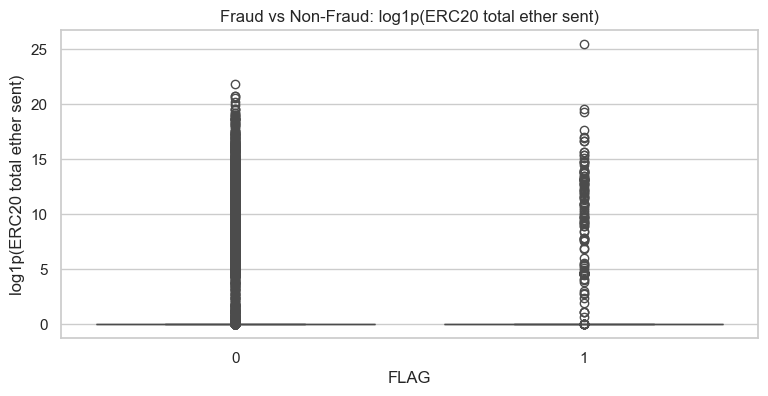

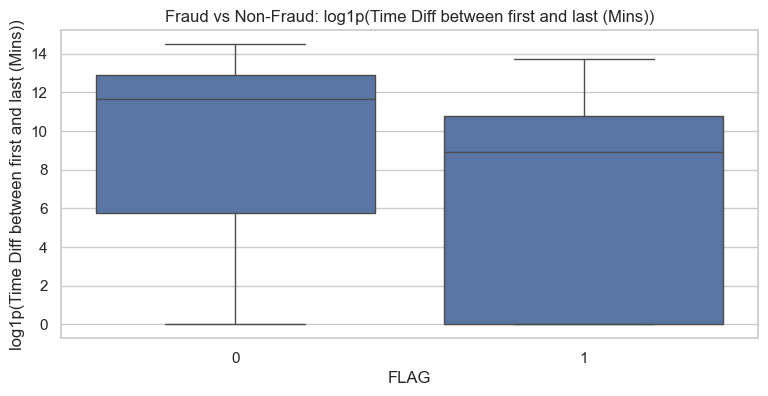

In [13]:
key_features = candidate[:]  # reuse curated list

for c in key_features:
    plt.figure(figsize=(9, 4))
    tmp = df[[c, "FLAG"]].copy()
    tmp[c] = pd.to_numeric(tmp[c], errors="coerce")
    tmp["log1p"] = np.log1p(tmp[c])

    sns.boxplot(data=tmp, x="FLAG", y="log1p")
    plt.title(f"Fraud vs Non-Fraud: log1p({c})")
    plt.xlabel("FLAG")
    plt.ylabel(f"log1p({c})")
    plt.show()


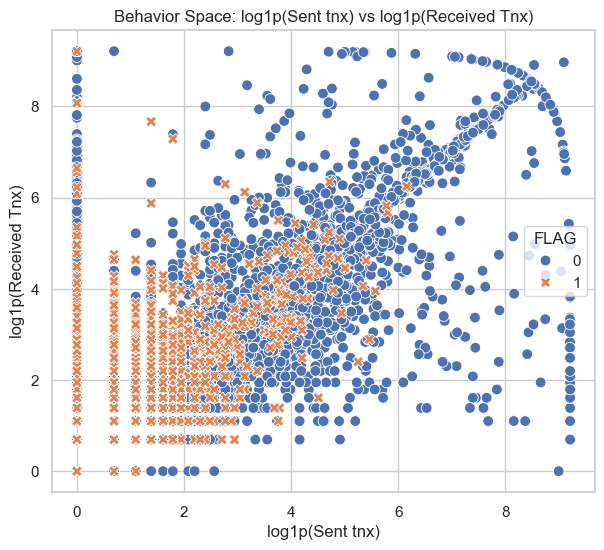

In [14]:
xcol = "Sent tnx" if "Sent tnx" in df.columns else None
ycol = "Received Tnx" if "Received Tnx" in df.columns else None

if xcol and ycol:
    plt.figure(figsize=(7, 6))
    tmp = df[[xcol, ycol, "FLAG"]].copy()
    tmp[xcol] = pd.to_numeric(tmp[xcol], errors="coerce")
    tmp[ycol] = pd.to_numeric(tmp[ycol], errors="coerce")

    sns.scatterplot(
        data=tmp,
        x=np.log1p(tmp[xcol]),
        y=np.log1p(tmp[ycol]),
        hue="FLAG",
        style="FLAG",
        s=60
    )
    plt.title("Behavior Space: log1p(Sent tnx) vs log1p(Received Tnx)")
    plt.xlabel("log1p(Sent tnx)")
    plt.ylabel("log1p(Received Tnx)")
    plt.legend(title="FLAG")
    plt.show()


ether_net_received           ether_total_volume             txn_in_out_ratio          
                   mean    median               mean      median             mean    median
FLAG                                                                                       
0           1894.844702  0.002200       27946.335158  116.382428        84.299418  1.000000
1              9.521323  0.000861         184.268119    3.306460        14.649885  1.467532

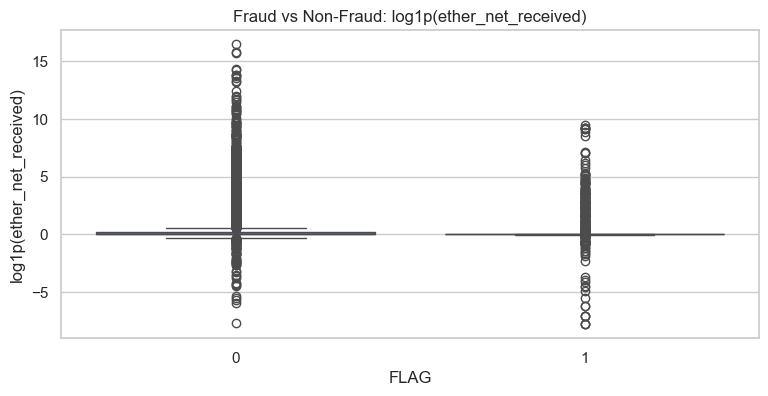

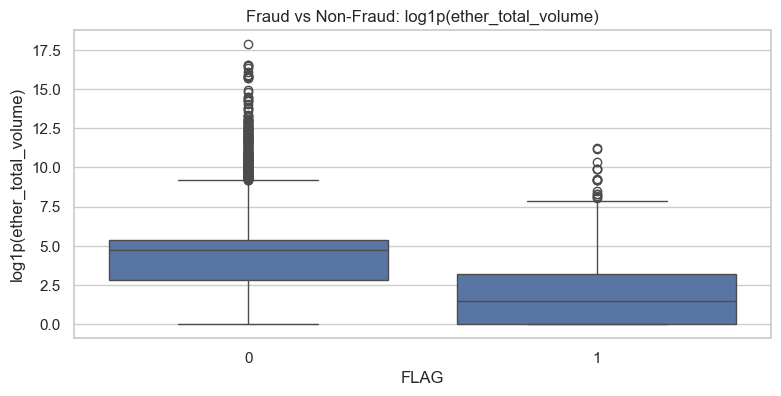

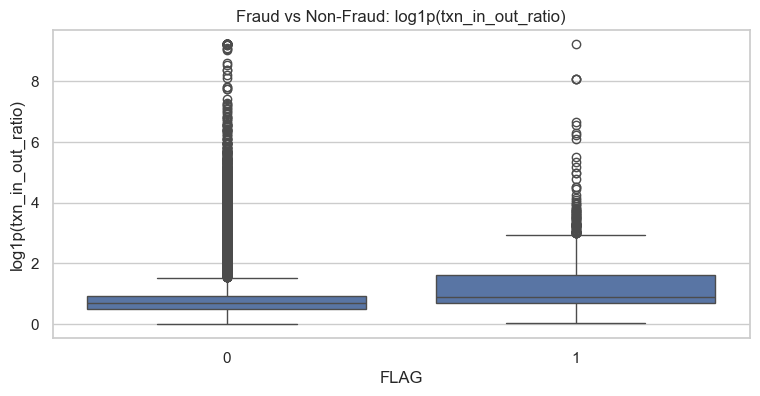

In [15]:
derived = df.copy()

# Add safe derived metrics if base columns exist
if "total Ether sent" in derived.columns and "total ether received" in derived.columns:
    derived["ether_net_received"] = pd.to_numeric(derived["total ether received"], errors="coerce") - pd.to_numeric(derived["total Ether sent"], errors="coerce")
    derived["ether_total_volume"] = pd.to_numeric(derived["total ether received"], errors="coerce") + pd.to_numeric(derived["total Ether sent"], errors="coerce")

if "Sent tnx" in derived.columns and "Received Tnx" in derived.columns:
    s = pd.to_numeric(derived["Sent tnx"], errors="coerce")
    r = pd.to_numeric(derived["Received Tnx"], errors="coerce")
    derived["txn_in_out_ratio"] = (r + 1) / (s + 1)  # +1 avoids divide-by-zero

show_cols = [c for c in ["ether_net_received", "ether_total_volume", "txn_in_out_ratio"] if c in derived.columns]
display(derived.groupby("FLAG")[show_cols].agg(["mean", "median"]))

for c in show_cols:
    plt.figure(figsize=(9, 4))
    sns.boxplot(data=derived, x="FLAG", y=np.log1p(pd.to_numeric(derived[c], errors="coerce")))
    plt.title(f"Fraud vs Non-Fraud: log1p({c})")
    plt.xlabel("FLAG")
    plt.ylabel(f"log1p({c})")
    plt.show()


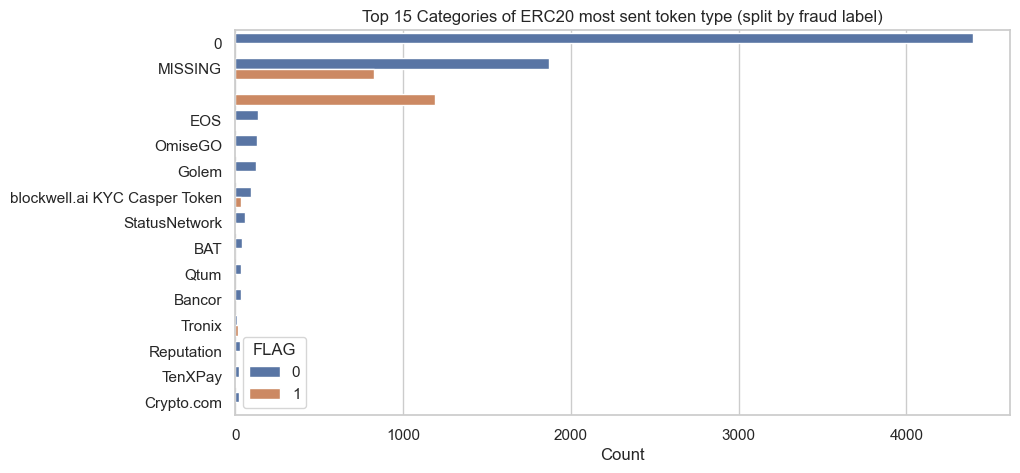

ERC20 most sent token type: missing rate = 27.41%


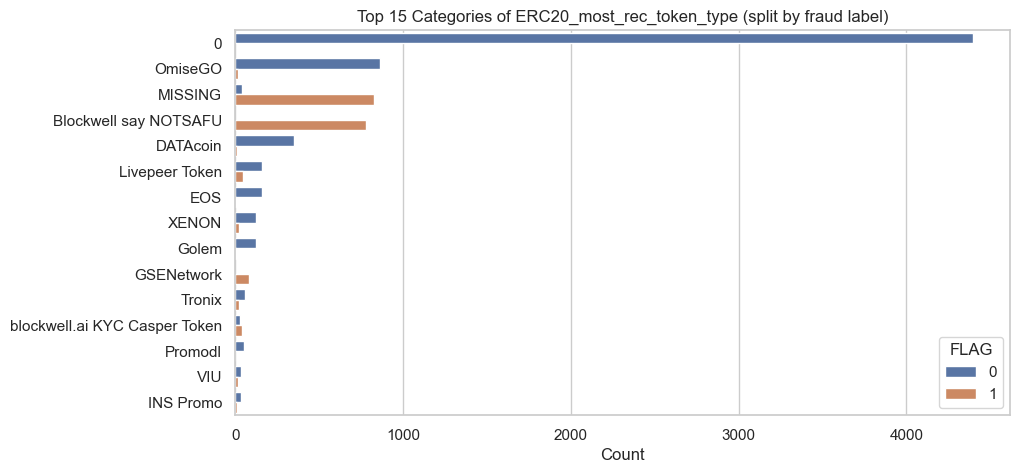

ERC20_most_rec_token_type: missing rate = 8.85%


In [16]:
cat_cols_focus = [c for c in ["ERC20 most sent token type", "ERC20_most_rec_token_type"] if c in df.columns]

for c in cat_cols_focus:
    plt.figure(figsize=(10, 5))
    top = df[c].fillna("MISSING").value_counts().head(15).index
    tmp = df[df[c].fillna("MISSING").isin(top)].copy()
    tmp[c] = tmp[c].fillna("MISSING")

    # stacked-ish countplot by fraud label
    sns.countplot(data=tmp, y=c, hue="FLAG", order=top)
    plt.title(f"Top 15 Categories of {c} (split by fraud label)")
    plt.xlabel("Count")
    plt.ylabel("")
    plt.legend(title="FLAG")
    plt.show()

    miss_rate = df[c].isna().mean()
    print(f"{c}: missing rate = {miss_rate:.2%}")


,feature,iqr_outlier_rate
23,total ether balance,0.313586
36,ERC20 min val rec,0.249889
25,ERC20 total Ether received,0.223813
37,ERC20 max val rec,0.220817
38,ERC20 avg val rec,0.217044
2,Avg min between sent tnx,0.213901
10,min value received,0.212275
5,Sent tnx,0.171731
6,Received Tnx,0.170410
24,Total ERC20 tnxs,0.164447


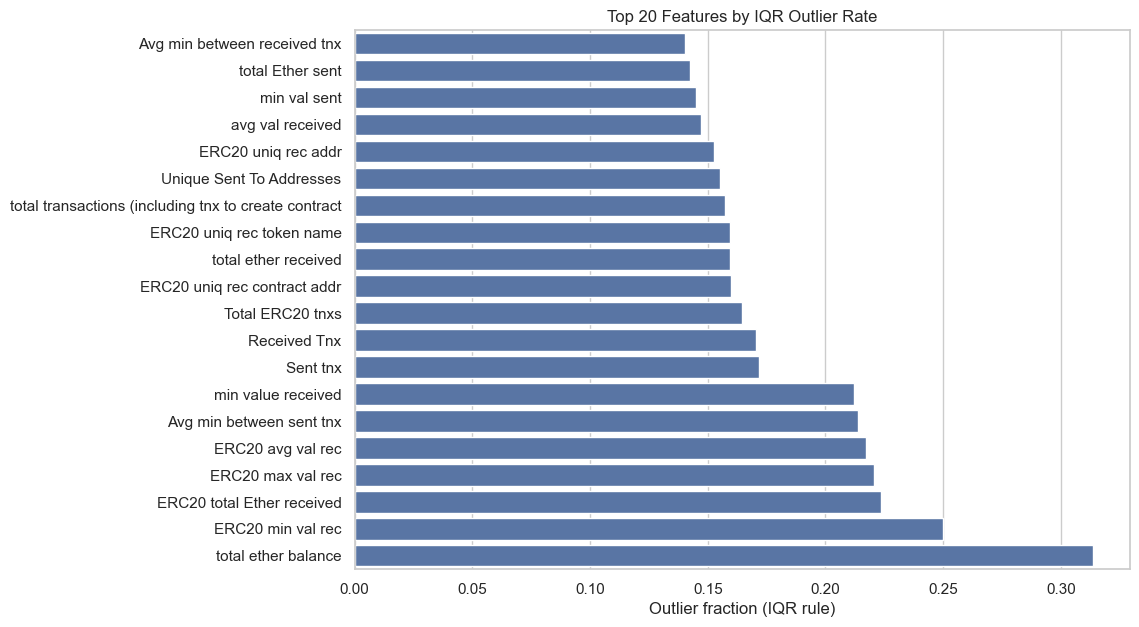

In [17]:
def outlier_rate_iqr(s):
    s = pd.to_numeric(s, errors="coerce").dropna()
    if len(s) < 10:
        return np.nan
    q1, q3 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q3 - q1
    if iqr == 0:
        return 0.0
    lo, hi = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return ((s < lo) | (s > hi)).mean()

out_rates = []
for c in numeric_cols:
    out_rates.append((c, outlier_rate_iqr(df[c])))

out_df = pd.DataFrame(out_rates, columns=["feature", "iqr_outlier_rate"]).dropna().sort_values("iqr_outlier_rate", ascending=False)
display(out_df.head(20))

plt.figure(figsize=(10, 7))
top = out_df.head(20).sort_values("iqr_outlier_rate")
sns.barplot(data=top, x="iqr_outlier_rate", y="feature")
plt.title("Top 20 Features by IQR Outlier Rate")
plt.xlabel("Outlier fraction (IQR rule)")
plt.ylabel("")
plt.show()


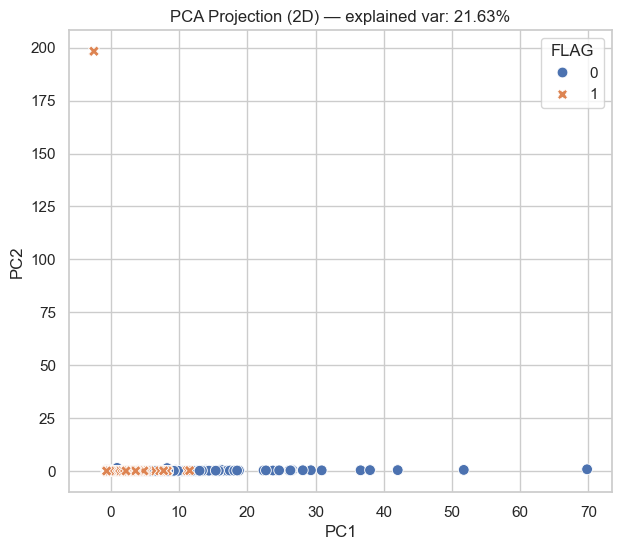

In [18]:
from sklearn.decomposition import PCA

# Numeric-only matrix
X_num = df[numeric_cols].copy()
y = df["FLAG"].astype(int)

# Impute + scale
X_num = X_num.apply(pd.to_numeric, errors="coerce")
X_num_imputed = SimpleImputer(strategy="median").fit_transform(X_num)
X_scaled = StandardScaler().fit_transform(X_num_imputed)

pca = PCA(n_components=2, random_state=42)
Z = pca.fit_transform(X_scaled)

plt.figure(figsize=(7, 6))
sns.scatterplot(x=Z[:,0], y=Z[:,1], hue=y, style=y, s=60)
plt.title(f"PCA Projection (2D) — explained var: {pca.explained_variance_ratio_.sum():.2%}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="FLAG")
plt.show()


,Metric,Count
0,Total Rows,9841
1,Unique Wallet Addresses,9816


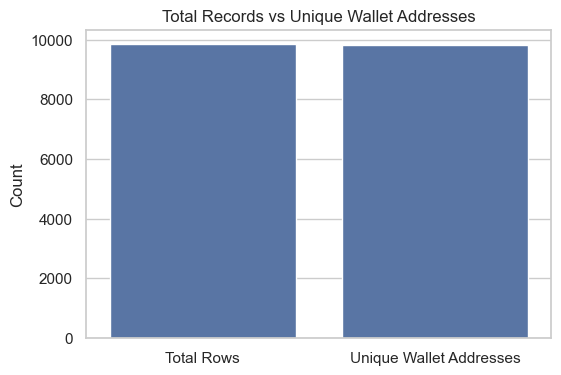

In [19]:
# Count unique wallet addresses
unique_wallets = df["Address"].nunique()
total_rows = len(df)

summary_df = pd.DataFrame({
    "Metric": ["Total Rows", "Unique Wallet Addresses"],
    "Count": [total_rows, unique_wallets]
})

display(summary_df)

plt.figure(figsize=(6, 4))
sns.barplot(data=summary_df, x="Metric", y="Count")
plt.title("Total Records vs Unique Wallet Addresses")
plt.ylabel("Count")
plt.xlabel("")
plt.show()


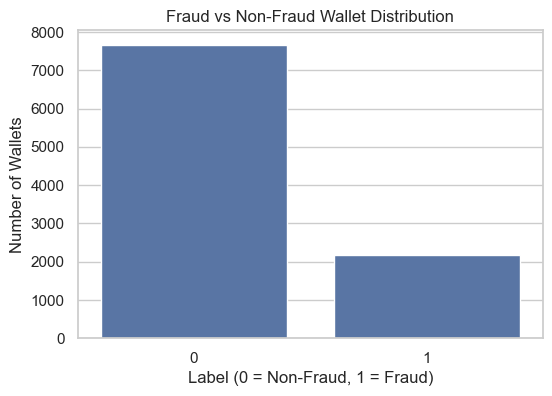

Fraud Wallet Percentage: 22.14%


In [20]:
label_counts = df["FLAG"].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index.astype(str), y=label_counts.values)
plt.title("Fraud vs Non-Fraud Wallet Distribution")
plt.xlabel("Label (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Number of Wallets")
plt.show()

fraud_percentage = (df["FLAG"] == 1).mean() * 100
print(f"Fraud Wallet Percentage: {fraud_percentage:.2f}%")


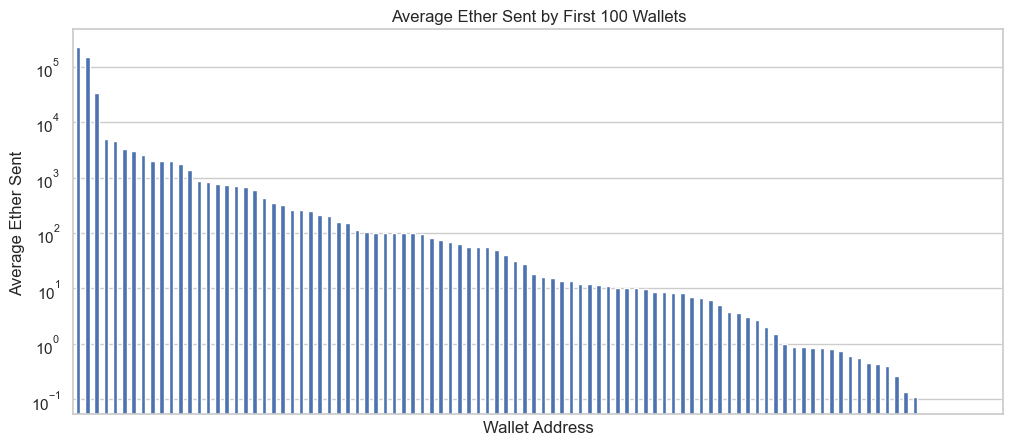

In [21]:
# Select first 100 wallets (by dataset order)
first_100 = df.head(100).copy()

# Convert to numeric safely
first_100["total Ether sent"] = pd.to_numeric(
    first_100["total Ether sent"], errors="coerce"
)

avg_ether_sent = (
    first_100
    .groupby("Address")["total Ether sent"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 5))
avg_ether_sent.plot(kind="bar")
plt.title("Average Ether Sent by First 100 Wallets")
plt.xlabel("Wallet Address")
plt.ylabel("Average Ether Sent")
plt.xticks([], [])  # hide crowded labels
plt.yscale("log")   # IMPORTANT for blockchain values
plt.show()


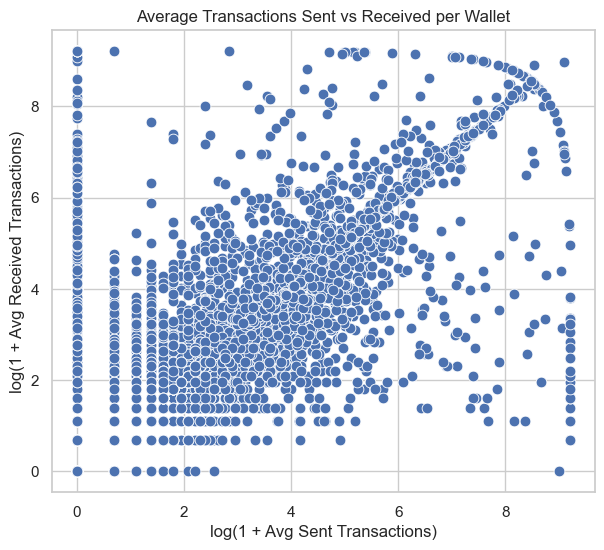

In [23]:
txn_df = df.copy()

txn_df["Sent tnx"] = pd.to_numeric(txn_df["Sent tnx"], errors="coerce")
txn_df["Received Tnx"] = pd.to_numeric(txn_df["Received Tnx"], errors="coerce")

wallet_txn = (
    txn_df
    .groupby("Address")[["Sent tnx", "Received Tnx"]]
    .mean()
    .reset_index()
)

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=wallet_txn,
    x=np.log1p(wallet_txn["Sent tnx"]),
    y=np.log1p(wallet_txn["Received Tnx"]),
    s=60
)

plt.title("Average Transactions Sent vs Received per Wallet")
plt.xlabel("log(1 + Avg Sent Transactions)")
plt.ylabel("log(1 + Avg Received Transactions)")
plt.show()


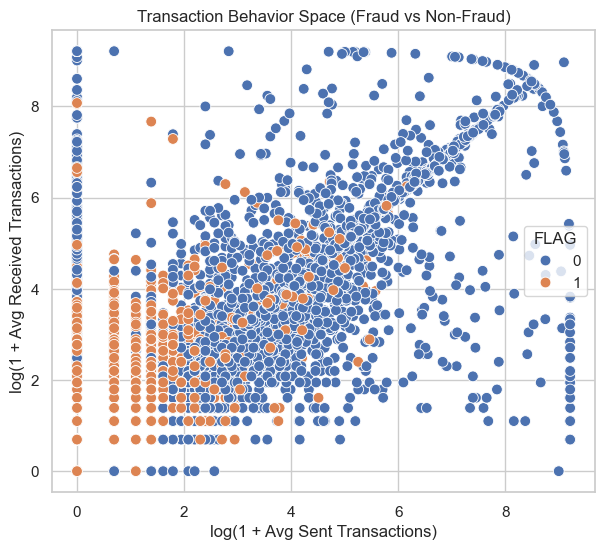

In [24]:
wallet_txn_label = (
    txn_df
    .groupby(["Address", "FLAG"])[["Sent tnx", "Received Tnx"]]
    .mean()
    .reset_index()
)

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=wallet_txn_label,
    x=np.log1p(wallet_txn_label["Sent tnx"]),
    y=np.log1p(wallet_txn_label["Received Tnx"]),
    hue="FLAG",
    s=60
)

plt.title("Transaction Behavior Space (Fraud vs Non-Fraud)")
plt.xlabel("log(1 + Avg Sent Transactions)")
plt.ylabel("log(1 + Avg Received Transactions)")
plt.legend(title="FLAG")
plt.show()


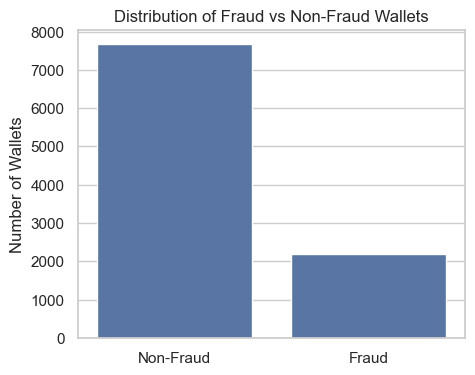

Fraud Rate: 22.14%


In [25]:
label_counts = df["FLAG"].value_counts().sort_index()

plt.figure(figsize=(5, 4))
sns.barplot(x=["Non-Fraud", "Fraud"], y=label_counts.values)
plt.title("Distribution of Fraud vs Non-Fraud Wallets")
plt.ylabel("Number of Wallets")
plt.xlabel("")
plt.show()

print(f"Fraud Rate: {(df['FLAG']==1).mean()*100:.2f}%")


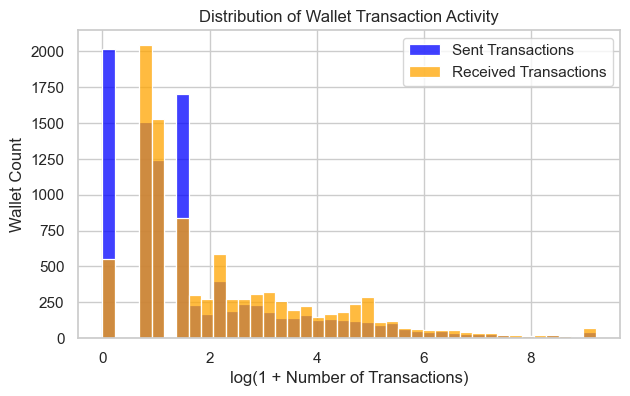

In [26]:
plt.figure(figsize=(7, 4))

sns.histplot(np.log1p(df["Sent tnx"]), bins=40, label="Sent Transactions", color="blue")
sns.histplot(np.log1p(df["Received Tnx"]), bins=40, label="Received Transactions", color="orange")

plt.title("Distribution of Wallet Transaction Activity")
plt.xlabel("log(1 + Number of Transactions)")
plt.ylabel("Wallet Count")
plt.legend()
plt.show()


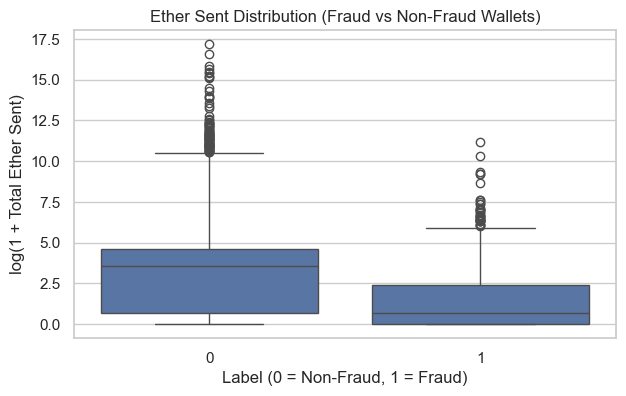

In [27]:
ether_cols = ["total Ether sent", "total ether received"]

plt.figure(figsize=(7, 4))

sns.boxplot(
    data=df,
    x="FLAG",
    y=np.log1p(pd.to_numeric(df["total Ether sent"], errors="coerce"))
)

plt.title("Ether Sent Distribution (Fraud vs Non-Fraud Wallets)")
plt.xlabel("Label (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("log(1 + Total Ether Sent)")
plt.show()


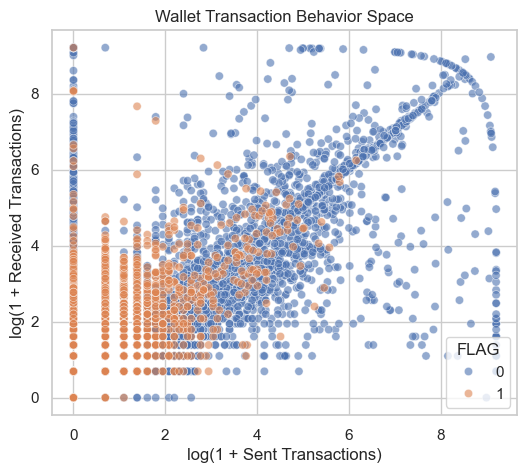

In [28]:
plt.figure(figsize=(6, 5))

sns.scatterplot(
    x=np.log1p(df["Sent tnx"]),
    y=np.log1p(df["Received Tnx"]),
    hue=df["FLAG"],
    alpha=0.6
)

plt.title("Wallet Transaction Behavior Space")
plt.xlabel("log(1 + Sent Transactions)")
plt.ylabel("log(1 + Received Transactions)")
plt.legend(title="FLAG")
plt.show()


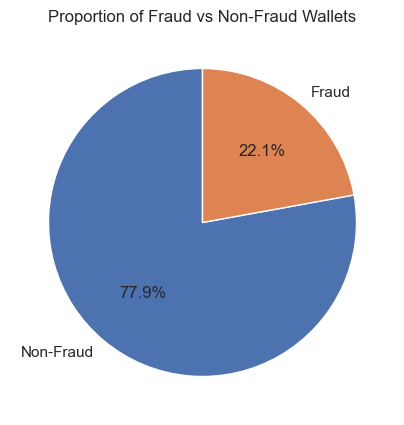

In [29]:
labels = ["Non-Fraud", "Fraud"]
sizes = df["FLAG"].value_counts().sort_index().values

plt.figure(figsize=(5, 5))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={"edgecolor": "white"}
)
plt.title("Proportion of Fraud vs Non-Fraud Wallets")
plt.show()


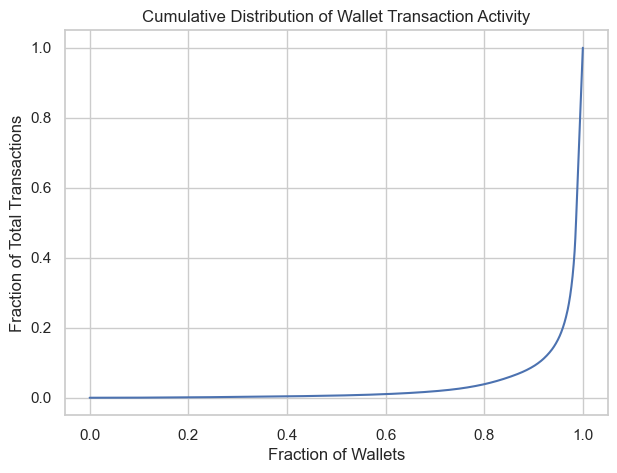

In [30]:
# Prepare transaction activity
activity = (
    pd.to_numeric(df["Sent tnx"], errors="coerce") +
    pd.to_numeric(df["Received Tnx"], errors="coerce")
)

activity = activity.sort_values().reset_index(drop=True)

cumulative_wallets = np.arange(1, len(activity) + 1) / len(activity)
cumulative_activity = activity.cumsum() / activity.sum()

plt.figure(figsize=(7, 5))
plt.plot(cumulative_wallets, cumulative_activity)
plt.title("Cumulative Distribution of Wallet Transaction Activity")
plt.xlabel("Fraction of Wallets")
plt.ylabel("Fraction of Total Transactions")
plt.grid(True)
plt.show()


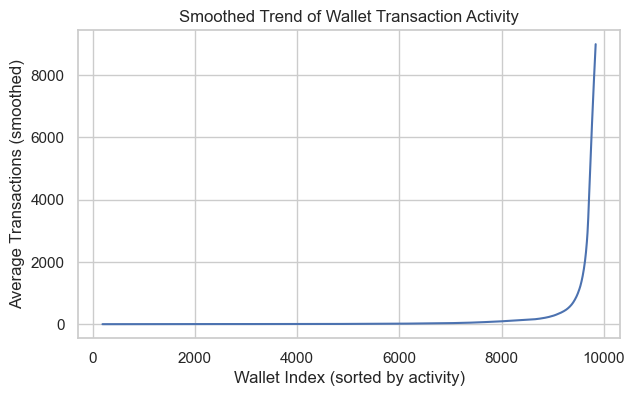

In [31]:
wallet_activity = (
    df.assign(
        total_txn=lambda x: pd.to_numeric(x["Sent tnx"], errors="coerce") +
                             pd.to_numeric(x["Received Tnx"], errors="coerce")
    )
    .sort_values("total_txn")
    .reset_index(drop=True)
)

window = max(50, len(wallet_activity)//50)  # adaptive smoothing
smoothed = wallet_activity["total_txn"].rolling(window).mean()

plt.figure(figsize=(7, 4))
plt.plot(smoothed)
plt.title("Smoothed Trend of Wallet Transaction Activity")
plt.xlabel("Wallet Index (sorted by activity)")
plt.ylabel("Average Transactions (smoothed)")
plt.show()


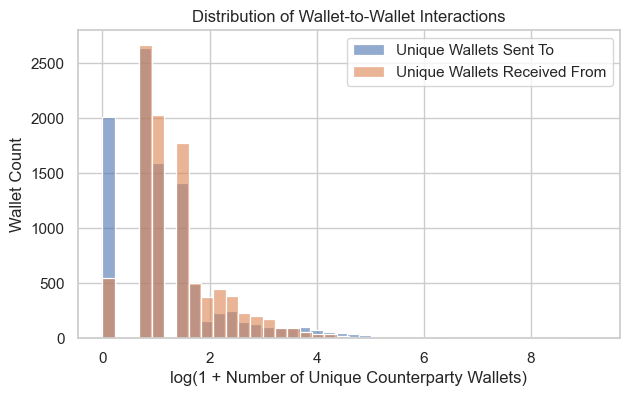

In [32]:
# Convert safely to numeric
sent_unique = pd.to_numeric(df["Unique Sent To Addresses"], errors="coerce")
recv_unique = pd.to_numeric(df["Unique Received From Addresses"], errors="coerce")

plt.figure(figsize=(7, 4))

sns.histplot(
    np.log1p(sent_unique),
    bins=40,
    label="Unique Wallets Sent To",
    alpha=0.6
)

sns.histplot(
    np.log1p(recv_unique),
    bins=40,
    label="Unique Wallets Received From",
    alpha=0.6
)

plt.title("Distribution of Wallet-to-Wallet Interactions")
plt.xlabel("log(1 + Number of Unique Counterparty Wallets)")
plt.ylabel("Wallet Count")
plt.legend()
plt.show()


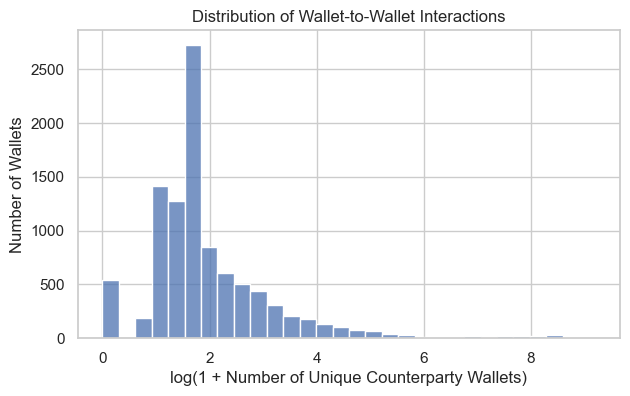

In [33]:
# Combine sent + received interactions
sent_unique = pd.to_numeric(df["Unique Sent To Addresses"], errors="coerce").fillna(0)
recv_unique = pd.to_numeric(df["Unique Received From Addresses"], errors="coerce").fillna(0)

total_counterpart_wallets = sent_unique + recv_unique

plt.figure(figsize=(7, 4))

sns.histplot(
    np.log1p(total_counterpart_wallets),
    bins=30
)

plt.title("Distribution of Wallet-to-Wallet Interactions")
plt.xlabel("log(1 + Number of Unique Counterparty Wallets)")
plt.ylabel("Number of Wallets")
plt.show()


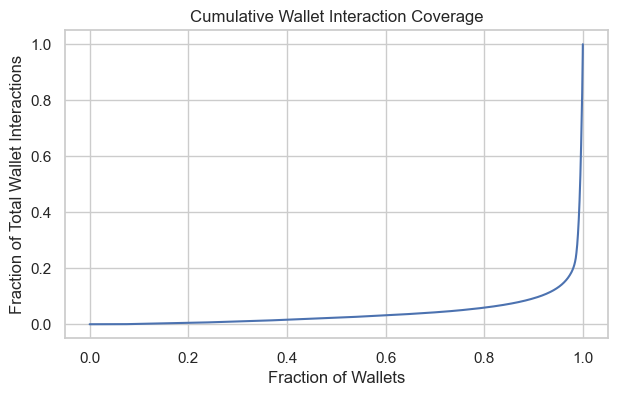

In [34]:
sorted_interactions = np.sort(total_counterpart_wallets)
cum_wallets = np.arange(1, len(sorted_interactions) + 1) / len(sorted_interactions)
cum_interactions = np.cumsum(sorted_interactions) / sorted_interactions.sum()

plt.figure(figsize=(7, 4))
plt.plot(cum_wallets, cum_interactions)
plt.title("Cumulative Wallet Interaction Coverage")
plt.xlabel("Fraction of Wallets")
plt.ylabel("Fraction of Total Wallet Interactions")
plt.grid(True)
plt.show()


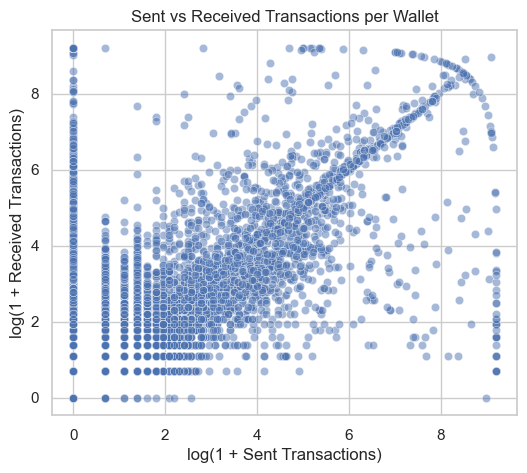

In [35]:
plt.figure(figsize=(6, 5))

sns.scatterplot(
    x=np.log1p(df["Sent tnx"]),
    y=np.log1p(df["Received Tnx"]),
    alpha=0.5
)

plt.title("Sent vs Received Transactions per Wallet")
plt.xlabel("log(1 + Sent Transactions)")
plt.ylabel("log(1 + Received Transactions)")
plt.show()


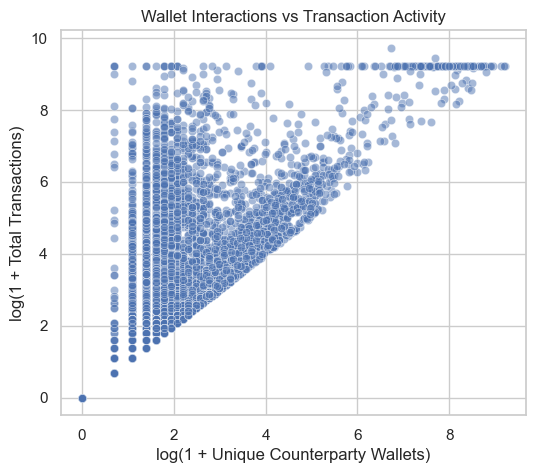

In [36]:
total_interactions = (
    pd.to_numeric(df["Unique Sent To Addresses"], errors="coerce").fillna(0) +
    pd.to_numeric(df["Unique Received From Addresses"], errors="coerce").fillna(0)
)

total_txn = (
    pd.to_numeric(df["Sent tnx"], errors="coerce").fillna(0) +
    pd.to_numeric(df["Received Tnx"], errors="coerce").fillna(0)
)

plt.figure(figsize=(6, 5))

sns.scatterplot(
    x=np.log1p(total_interactions),
    y=np.log1p(total_txn),
    alpha=0.5
)

plt.title("Wallet Interactions vs Transaction Activity")
plt.xlabel("log(1 + Unique Counterparty Wallets)")
plt.ylabel("log(1 + Total Transactions)")
plt.show()


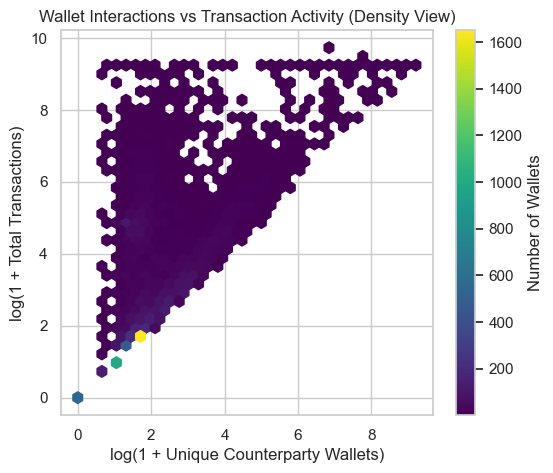

In [37]:
x = np.log1p(
    pd.to_numeric(df["Unique Sent To Addresses"], errors="coerce").fillna(0) +
    pd.to_numeric(df["Unique Received From Addresses"], errors="coerce").fillna(0)
)

y = np.log1p(
    pd.to_numeric(df["Sent tnx"], errors="coerce").fillna(0) +
    pd.to_numeric(df["Received Tnx"], errors="coerce").fillna(0)
)

plt.figure(figsize=(6, 5))
plt.hexbin(x, y, gridsize=35, cmap="viridis", mincnt=1)
plt.colorbar(label="Number of Wallets")

plt.title("Wallet Interactions vs Transaction Activity (Density View)")
plt.xlabel("log(1 + Unique Counterparty Wallets)")
plt.ylabel("log(1 + Total Transactions)")
plt.show()


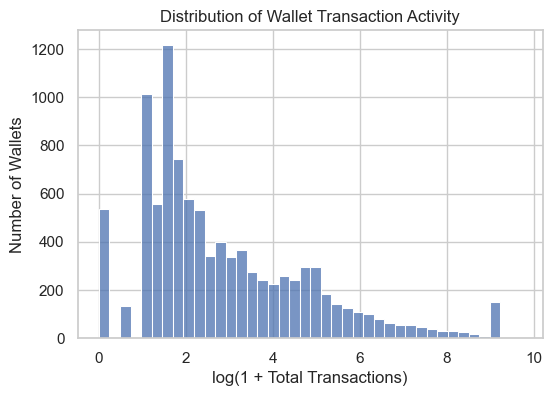

In [38]:
total_txn = (
    pd.to_numeric(df["Sent tnx"], errors="coerce") +
    pd.to_numeric(df["Received Tnx"], errors="coerce")
)

plt.figure(figsize=(6, 4))
sns.histplot(np.log1p(total_txn), bins=40)
plt.title("Distribution of Wallet Transaction Activity")
plt.xlabel("log(1 + Total Transactions)")
plt.ylabel("Number of Wallets")
plt.show()


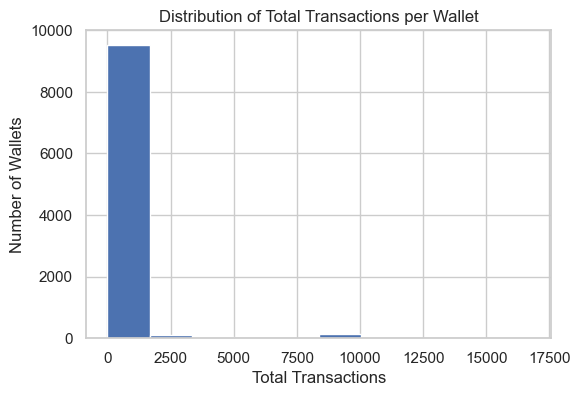

In [40]:
total_txn = df["Sent tnx"] + df["Received Tnx"]

plt.figure(figsize=(6, 4))
plt.hist(total_txn, bins=10)
plt.title("Distribution of Total Transactions per Wallet")
plt.xlabel("Total Transactions")
plt.ylabel("Number of Wallets")
plt.show()



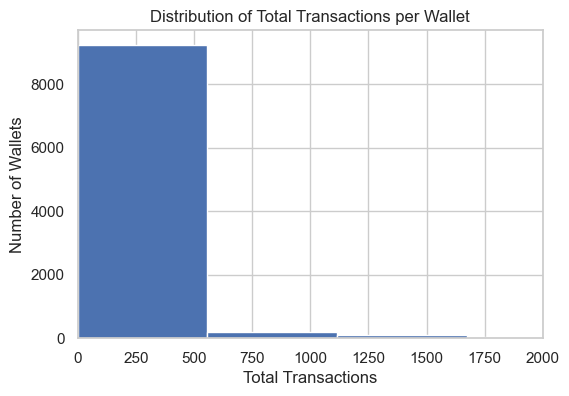

In [41]:
plt.figure(figsize=(6, 4))
plt.hist(total_txn, bins=30)
plt.xlim(0, 2000)  # focus on majority
plt.title("Distribution of Total Transactions per Wallet")
plt.xlabel("Total Transactions")
plt.ylabel("Number of Wallets")
plt.show()


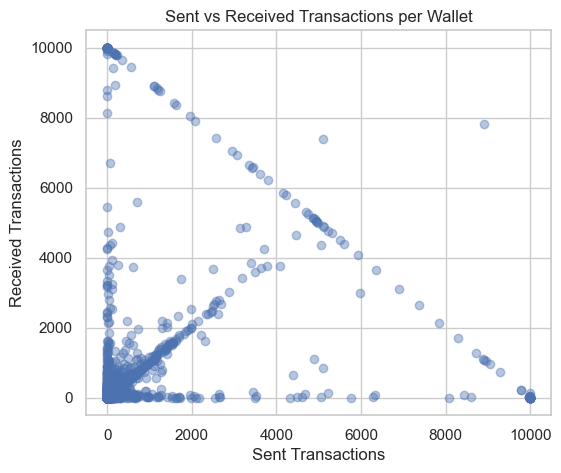

In [42]:
plt.figure(figsize=(6,5))
plt.scatter(df["Sent tnx"], df["Received Tnx"], alpha=0.4)
plt.title("Sent vs Received Transactions per Wallet")
plt.xlabel("Sent Transactions")
plt.ylabel("Received Transactions")
plt.show()


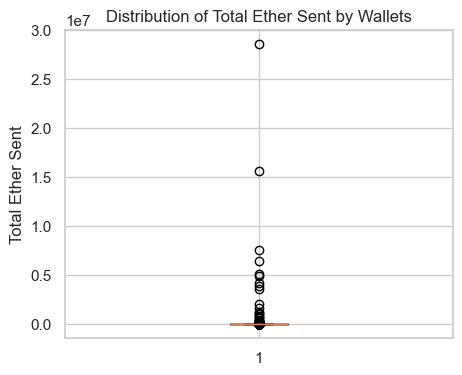

In [43]:
plt.figure(figsize=(5,4))
plt.boxplot(df["total Ether sent"].dropna())
plt.title("Distribution of Total Ether Sent by Wallets")
plt.ylabel("Total Ether Sent")
plt.show()


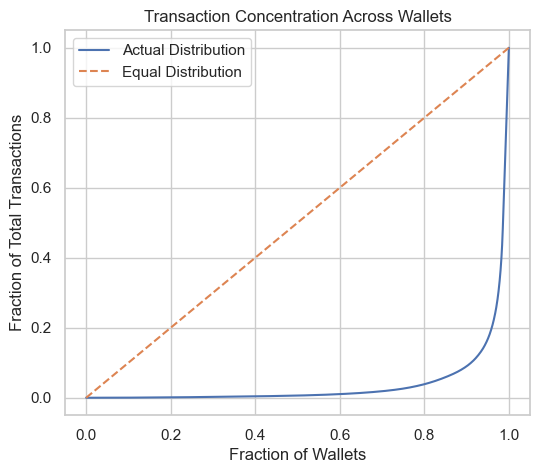

In [44]:
total_txn = (
    pd.to_numeric(df["Sent tnx"], errors="coerce").fillna(0) +
    pd.to_numeric(df["Received Tnx"], errors="coerce").fillna(0)
)

sorted_txn = np.sort(total_txn)
cum_wallets = np.arange(1, len(sorted_txn)+1) / len(sorted_txn)
cum_txn = np.cumsum(sorted_txn) / sorted_txn.sum()

plt.figure(figsize=(6,5))
plt.plot(cum_wallets, cum_txn, label="Actual Distribution")
plt.plot([0,1], [0,1], linestyle="--", label="Equal Distribution")
plt.xlabel("Fraction of Wallets")
plt.ylabel("Fraction of Total Transactions")
plt.title("Transaction Concentration Across Wallets")
plt.legend()
plt.show()


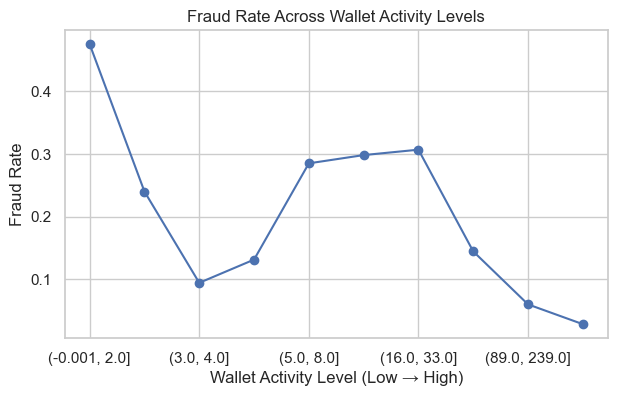

In [45]:
activity = total_txn.copy()

df_tmp = df.copy()
df_tmp["total_txn"] = activity
df_tmp["activity_decile"] = pd.qcut(df_tmp["total_txn"], 10, duplicates="drop")

fraud_rate = df_tmp.groupby("activity_decile")["FLAG"].mean()

plt.figure(figsize=(7,4))
fraud_rate.plot(marker="o")
plt.title("Fraud Rate Across Wallet Activity Levels")
plt.xlabel("Wallet Activity Level (Low → High)")
plt.ylabel("Fraud Rate")
plt.show()


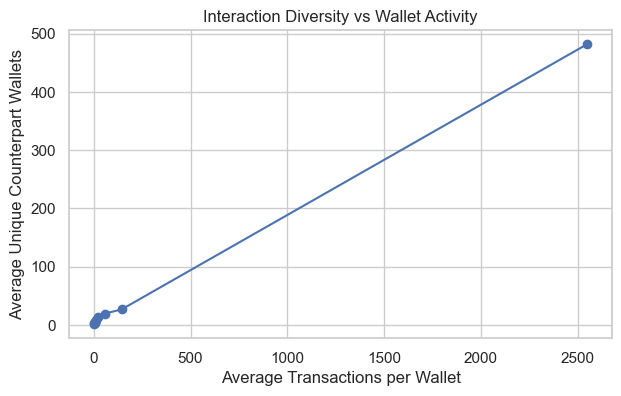

In [46]:
interactions = (
    pd.to_numeric(df["Unique Sent To Addresses"], errors="coerce").fillna(0) +
    pd.to_numeric(df["Unique Received From Addresses"], errors="coerce").fillna(0)
)

df_tmp["interactions"] = interactions

grouped = df_tmp.groupby("activity_decile").agg({
    "interactions": "mean",
    "total_txn": "mean"
})

plt.figure(figsize=(7,4))
plt.plot(grouped["total_txn"], grouped["interactions"], marker="o")
plt.xlabel("Average Transactions per Wallet")
plt.ylabel("Average Unique Counterpart Wallets")
plt.title("Interaction Diversity vs Wallet Activity")
plt.show()
